**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Loading Our Dataset**

In [ ]:
df = pd.read_csv('/content/TSLA[1].csv')

**Feature Extraction**

The number of the trading days and the columns:

In [ ]:
df.shape

(2416, 7)

In [ ]:
df = df['Open'].values
df = df.reshape(-1, 1)

After extracting one column:

In [ ]:
df.shape

(2416, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1932, 1)
(484, 1)


Importing our model:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

Scaling data:

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.00771826],
       [0.02604237],
       [0.02391041],
       [0.01851302],
       [0.01041695]])

In [ ]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.83886118],
       [0.85346111],
       [0.85713129],
       [0.83470517],
       [0.85472941]])

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

Creating training and testing datasets:

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

Creating our LSTM model:

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Reshape features for the LSTM layer:

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

Start the training:

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 13s 108ms/step - loss: 0.0191
Epoch 2/50
59/59 [==============================] - 6s 100ms/step - loss: 0.0036
Epoch 3/50
59/59 [==============================] - 6s 107ms/step - loss: 0.0031
Epoch 4/50
59/59 [==============================] - 6s 99ms/step - loss: 0.0030
Epoch 5/50
59/59 [==============================] - 6s 102ms/step - loss: 0.0029
Epoch 6/50
59/59 [==============================] - 10s 169ms/step - loss: 0.0028
Epoch 7/50
59/59 [==============================] - 6s 105ms/step - loss: 0.0028
Epoch 8/50
59/59 [==============================] - 6s 102ms/step - loss: 0.0025
Epoch 9/50
59/59 [==============================] - 5s 93ms/step - loss: 0.0028
Epoch 10/50
59/59 [==============================] - 6s 102ms/step - loss: 0.0033
Epoch 11/50
59/59 [==============================] - 5s 92ms/step - loss: 0.0027
Epoch 12/50
59/59 [==============================] - 6s 103ms/step - loss: 0.0022
Epoch 13/50
59/59 [=======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model('stock_prediction.h5')

**Results visualization**

14/14 [==============================] - 1s 34ms/step


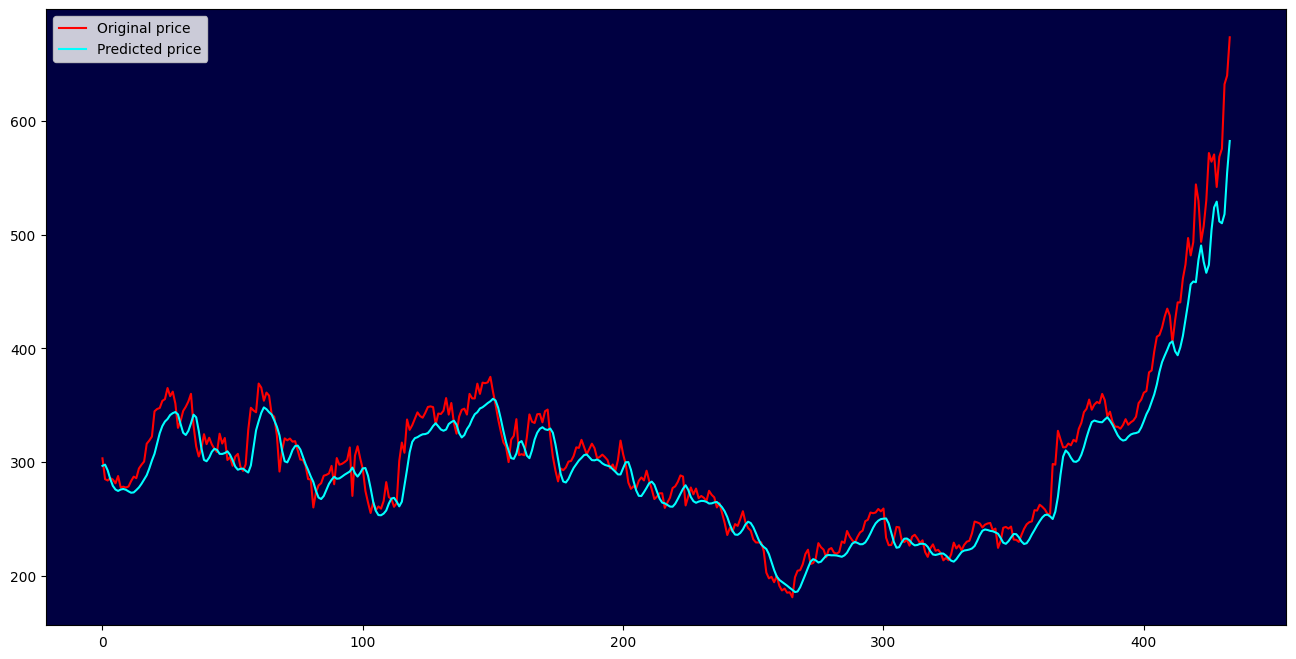

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()